In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

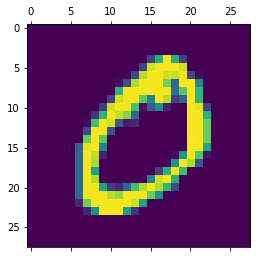

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train.shape

(60000,)

In [11]:
y_train[0:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [43]:
X_train = X_train/255
X_test = X_test/255

In [45]:
X_train_flattened = X_train.reshape(60000,784)


In [46]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
X_test_flattened = X_test.reshape(len(X_test),784)

In [48]:
X_test_flattened.shape

(10000, 784)

In [49]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating the neural network in Tensorflow and Keras

In [50]:
from keras import layers

Trying to improve accuracy

My input layer is flattened with 784 neurons
hidden layer 1 = 784/2 neurons
hiddenlayer 2 = 784/4 neurons
output layer = 10 neurons

In [78]:
model = keras.Sequential([
    keras.layers.Dense(784/2, input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(784/4, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [79]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [80]:
model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1915 - accuracy: 0.9432
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0817 - accuracy: 0.9744
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0557 - accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0400 - accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0321 - accuracy: 0.9899


In [76]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9732


[0.08604554086923599, 0.9732000231742859]

In [77]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [67]:
y_predicted[1]

array([3.4991500e-01, 4.5880475e-03, 9.9955744e-01, 4.7595680e-01,
       1.0880157e-09, 8.7082052e-01, 9.0585458e-01, 1.3263138e-12,
       1.6104682e-01, 2.1754349e-09], dtype=float32)

In [70]:
np.argmax(y_predicted[2])

1

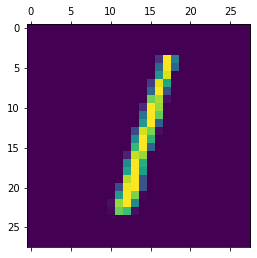

In [69]:
plt.matshow(X_test[2])